In [1]:
import salem
import xarray as xr
import numpy as np

In [2]:
data_path ='/exports/csce/datastore/geos/users/s1878599/python_code/sample_WRF_chem_out_202.nc'
#ds = salem.open_wrf_dataset(data_path)

In [3]:
shp_path = '/exports/csce/datastore/geos/users/s1878599//python_code/gadm_data/IGP/IGP.shp'
shdf = salem.read_shapefile(shp_path)

In [20]:
type(shdf)

geopandas.geodataframe.GeoDataFrame

In [4]:
shdf

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry,min_x,max_x,min_y,max_y
0,IND,India,IND.5_1,Bihar,None,None,State,State,None,IN.BR,"MULTIPOLYGON (((87.26292 27.85072, 87.25249 27...",83.316071,88.291916,24.287041,27.850716
1,IND,India,IND.12_1,Haryana,None,None,State,State,None,IN.HR,"POLYGON ((76.08009 27.85107, 76.06003 27.85718...",74.465263,77.592018,27.655970,30.930380
2,IND,India,IND.15_1,Jharkhand,Vananchal,None,State,State,None,IN.JH,"POLYGON ((86.72279 22.21525, 86.72097 22.21684...",83.323563,87.973343,21.966591,25.348391
3,IND,India,IND.25_1,NCT of Delhi,None,None,Union Territor,Union Territory,None,IN.DL,"POLYGON ((77.32713 28.68516, 77.32539 28.68250...",76.832916,77.337738,28.408461,28.884512
4,IND,India,IND.28_1,Punjab,None,None,State,State,None,IN.PB,"POLYGON ((74.27903 29.95509, 74.26031 29.95567...",73.870888,76.931396,29.546171,32.576191
5,IND,India,IND.34_1,Uttar Pradesh,United Provinces,None,State,State,None,IN.UP,"POLYGON ((77.70541 26.88028, 77.69773 26.88001...",77.084908,84.630600,23.872770,30.412458
6,IND,India,IND.36_1,West Bengal,Bangla|Bengala Occidentale|Bengala Ocidental|B...,None,State,State,None,IN.WB,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...",85.826363,89.877548,21.539446,27.221031
7,BGD,Bangladesh,BGD.1_1,Barisal,Bakerganj,None,Bibhag,Division,10,BD.BA,"MULTIPOLYGON (((90.47569 21.76975, 90.47565 21...",89.851936,91.004936,21.769331,23.085163
8,BGD,Bangladesh,BGD.3_1,Dhaka,Daca|Dacca,None,Bibhag,Division,30,BD.DH,"MULTIPOLYGON (((90.53403 23.09470, 90.53404 23...",89.298157,91.255791,22.852928,25.432739
9,BGD,Bangladesh,BGD.4_1,Khulna,None,None,Bibhag,Division,40,BD.KH,"MULTIPOLYGON (((89.23109 21.70012, 89.23134 21...",88.555771,89.969620,21.652525,24.193920


In [5]:
shdf_IGP = shdf.loc[\
                    (shdf['HASC_1'] == 'IN.UP')\
                    | (shdf['HASC_1'] == 'IN.WB')\
                    | (shdf['HASC_1'] == 'IN.DL')\
                    | (shdf['HASC_1'] == 'IN.PB')\
                    | (shdf['HASC_1'] == 'IN.HR')\
                    | (shdf['HASC_1'] == 'IN.BR')
                   ]

In [6]:
dsr = ds.salem.roi(shape=shdf)

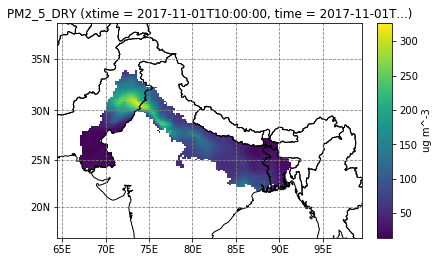

In [7]:
dsr.PM2_5_DRY.isel(time=5, bottom_top=0).salem.quick_map()

In [4]:
def get_IGP(data_path):
    "Return data only only in the IGP adminsitrative domain. Return is a dictionary containing the following datasets:\
     -all_IGP :contains all IGP states in BGD, PAK, IND. \
     -upper_IGP : data for states Punjab (PAK), Punjab (IND), Haryana, Delhi NCT (IND)\
     -middle_IGP : data for states Uttar Pradesh (IND), Bihar (IND) \
     -lower_IGP : data for states West Bengal (IND), B (IND), Barisal (BGD), Dhaka (BGD), Khulna (BGD),Rajshahi (BGD), Rangpur (IGP)\
     -Single states subsets (TO DO)."
    
    data={} # dictionary for containing datasets.
    
    ds = salem.open_wrf_dataset(data_path) # open data with salem.
    
    # get shapefiles.
    shp_path = '/exports/csce/datastore/geos/users/s1878599//python_code/gadm_data/IGP/IGP.shp'
    shdf= salem.read_shapefile(shp_path) # IGP shp.
    shdf_UIGP = shdf.loc[\
                      (shdf['HASC_1'] == 'IN.HR')\
                    | (shdf['HASC_1'] == 'IN.DL')\
                    | (shdf['HASC_1'] == 'IN.PB')\
                    | (shdf['HASC_1'] == 'PK.PB')\
                    ]
    shdf_MIGP = shdf.loc[\
                      (shdf['HASC_1'] == 'IN.UP')\
                    | (shdf['HASC_1'] == 'IN.BR')\
                    ]
    shdf_LIGP = shdf.loc[\
                      (shdf['HASC_1'] == 'IN.WB')\
                    | (shdf['HASC_1'] == 'IN.BR')\
                    | (shdf['GID_0'] == 'BGD')\
                    ]
    
    # Get data subsets.
    IGP = ds.salem.roi(shape=shdf)   
    UIGP = ds.salem.roi(shape=shdf_UIGP)
    MIGP = ds.salem.roi(shape=shdf_MIGP)
    LIGP = ds.salem.roi(shape=shdf_LIGP)
    
    # Add to list.
    data.update({'IGP': IGP})
    data.update({'U_IGP': UIGP})
    data.update({'M_IGP': MIGP})
    data.update({'L_IGP': LIGP})
    
    
    return data

In [5]:
data = get_IGP(data_path)

In [43]:
type(data)

dict

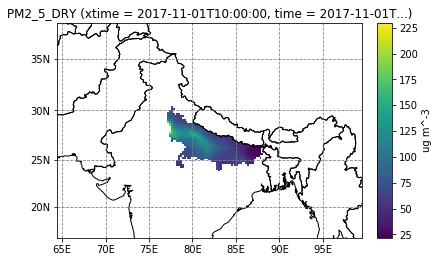

In [44]:
data['M_IGP'].PM2_5_DRY.isel(time=5, bottom_top=0).salem.quick_map()

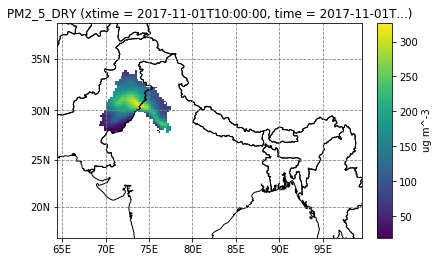

In [45]:
data['U_IGP'].PM2_5_DRY.isel(time=5, bottom_top=0).salem.quick_map()

In [23]:
def map_2D(dataset, var_name, level=0, mask_values=None,
           title=None, cmap = 'OrRd', coastline=True, borders=True,
           pixels=False, set_vmax=None, levs=10, save=False, format='pdf', dpi=1000):   
    
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
    import numpy as np
    from cartopy import config

    import cartopy.io.shapereader as shpreader
    
    
    # ------------------------- DRAW THE MAP --------------------------------
    # draw map.
    ax = plt.subplot(projection=ccrs.PlateCarree())
 
    # draw meridians and parallels.
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=0.5, color='k', alpha=0.4, linestyle='-')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'gray'}
    gl.ylabel_style = {'size': 10, 'color': 'grey'}


  
    # Add data from Global Administrative Areas Dataset GDAM https://gadm.org/index.html
    fname = '/exports/csce/datastore/geos/users/s1878599/python_code/gadm_data/IGP/U_IGP.shp'

    IND_provinces = list(shpreader.Reader(fname).geometries())
    ax.add_geometries(IND_provinces, ccrs.PlateCarree(),
                      edgecolor='black', facecolor='none', alpha=1,
                      lw=0.75)
    
    #fname = '/exports/csce/datastore/geos/users/s1878599/python_code/WRFChemToolkit/analysis/geo_data/gadm36_PAK_shp/gadm36_PAK_1.shp'   

    #PAK_provinces = list(shpreader.Reader(fname).geometries())
    #ax.add_geometries(PAK_provinces, ccrs.PlateCarree(),
                      #edgecolor='black', facecolor='none', alpha=0.5,
                      #lw=0.25)

   # ------------------------- GET DATA TO PLOT------------------------------
   
    # get variable from dataset.   
    var = dataset[var_name]
      
    # plot data at desired level.
    long = dataset.lon.values
    lat = dataset.lat.values
    
    if mask_values is None:
        var_values = var[level, :, :]
    else: 
        var_values= np.ma.masked_where(var[level,:,:].values < mask_values,
                                       var[level,:,:].values) 
   

   # -------------------------  PLOT DATA ----------------------------------
    
    #setting levels for bar plot.
    
    if not set_vmax is None:  # set vmax in the bar to a fixed costumed value (useful to compare consitently different plots).
        vmax=set_vmax  
    else: 
        import math                # Get the max value in the array to plot, and round to the next hundreds.
        max_val =var.values.max()       
        vmax = int(math.ceil(max_val / 100.0)) * 100
    
    vmin=0
    levels = np.linspace(vmin, vmax, levs)  # number of levels for which divide the bar. Customised. 
                                                  
    #plot type: contourf or pcolormesh.
    
    if pixels:
        cs = plt.pcolormesh(long, lat,var_values,
            transform=ccrs.PlateCarree(), cmap =cmap, levels=levels, vmin=vmin, vmax=vmax)
    else:    
        cs = plt.contourf(long, lat, var_values,
            transform=ccrs.PlateCarree(), cmap=cmap, levels=levels, vmin=vmin, vmax=vmax)
    
    # colorbar.
    cbar = plt.colorbar(cs)
    
    #title.
    ax.set_title(title)
    
    #save
    if save:
        plt.savefig( save + '.' + format, format=format, dpi=dpi)
    
    plt.show()

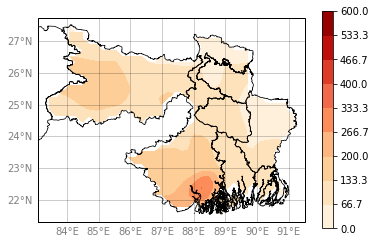

In [26]:
map_2D(data['L_IGP'].mean(dim='time'), 'PM2_5_DRY', set_vmax=600)

In [ ]:
def map_2D(dataset, var_name, level=0, mask_values=None,
           title=None, cmap = 'OrRd', coastline=True, borders=True,
           pixels=False, set_vmax=None, levs=10, save=False, format='pdf', dpi=1000):   
    
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
    import numpy as np
    from cartopy import config

    import cartopy.io.shapereader as shpreader
    
    
    # ------------------------- DRAW THE MAP --------------------------------
    # draw map.
    ax = plt.subplot(projection=ccrs.PlateCarree())
 
    # draw meridians and parallels.
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=0.5, color='k', alpha=0.4, linestyle='-')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'gray'}
    gl.ylabel_style = {'size': 10, 'color': 'grey'}


  
    # Add data from Global Administrative Areas Dataset GDAM https://gadm.org/index.html
    fname = '/exports/csce/datastore/geos/users/s1878599/python_code/gadm_data/IGP/U_IGP.shp'

    IND_provinces = list(shpreader.Reader(fname).geometries())
    ax.add_geometries(IND_provinces, ccrs.PlateCarree(),
                      edgecolor='black', facecolor='none', alpha=1,
                      lw=0.75)
    
   # ------------------------- GET DATA TO PLOT------------------------------
   
    # get variable from dataset.   
    var = data['L_IGP'].mean(dim='time').PM2_5_DRY
      
    # plot data at desired level.
    long = dataset.lon.values
    lat = dataset.lat.values
    var_values = var[0, :, :]
   
    cs = plt.contourf(long, lat, var_values,
              transform=ccrs.PlateCarree(), cmap='OrRd')
    
    # colorbar.
    cbar = plt.colorbar(cs)
    
    #title.
    ax.set_title(title)
    
    #save
    if save:
        plt.savefig( save + '.' + format, format=format, dpi=dpi)
    
    plt.show()

In [8]:
#define test data:
var = data['L_IGP'].mean(dim='time').PM2_5_DRY
long = data['L_IGP'].mean(dim='time').lon.values
lat = data['L_IGP'].mean(dim='time').lat.values
var_values = var[0, :, :]

var2 = data['U_IGP'].mean(dim='time').PM2_5_DRY
long2 = data['U_IGP'].mean(dim='time').lon.values
lat2 = data['U_IGP'].mean(dim='time').lat.values
var_values2 = var2[0, :, :]

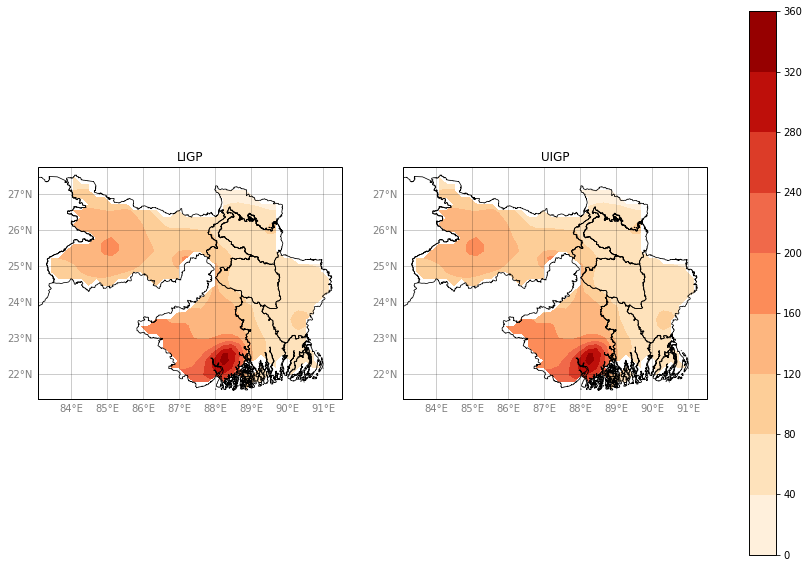

In [33]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.colorbar import colorbar
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
from cartopy import config
import cartopy.io.shapereader as shpreader
    
    
fig, axes =plt.subplots(1, 2, figsize=[15, 10], subplot_kw={'projection': ccrs.PlateCarree()})

shp = '/exports/csce/datastore/geos/users/s1878599/python_code/gadm_data/IGP/U_IGP.shp'
IND_provinces = list(shpreader.Reader(shp).geometries())


for ax in axes:
    #set grid:
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=0.5, color='k', alpha=0.4, linestyle='-')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'gray'}
    gl.ylabel_style = {'size': 10, 'color': 'grey'}

    # Add data from Global Administrative Areas Dataset GDAM https://gadm.org/index.html
    ax.add_geometries(IND_provinces, ccrs.PlateCarree(),
                      edgecolor='black', facecolor='none', alpha=1, lw=0.75)
   

cs = axes[0].contourf(long, lat, var_values,
              transform=ccrs.PlateCarree(), cmap='OrRd')
    
cs1 = axes[1].contourf(long, lat, var_values,
              transform=ccrs.PlateCarree(), cmap='OrRd')
    
axes[0].set_title('LIGP')
axes[1].set_title('UIGP')
    
cax, kw = mpl.colorbar.make_axes([ax for ax in axes.flat])
plt.colorbar(cs, cax=cax, **kw)
fig.colorbar(cs, cax=cax)


Does the bar refer at the colorscale for both the plots???